# pandas primer

 * Think of pandas as a cross between Excel and sql
 * Easy to work with, but very powerful

# Simple example

 * Assume have accumulated self-diffusion $D_z$ and thermodynamic data as a function of density, temperature, and pore-radius in separate files.
 * We want to look at the self-diffusion as a funciton of 

In [122]:
%%bash
head -n 10 diffusion.csv thermo.csv



==> diffusion.csv <==
dens,temp_r,rad_r,DZ
0.025,0.73,2.0,26.6361217499
0.025,0.73,2.0,25.7149219513
0.025,0.73,2.0,27.0507850647
0.025,0.85,2.0,29.7969245911
0.025,0.85,2.0,29.2770614624
0.025,0.85,2.0,28.1880435944
0.025,1.5,2.0,34.8119239807
0.025,1.5,2.0,35.7821273804
0.025,1.5,2.0,34.0112228394

==> thermo.csv <==
dens,temp_r,rad_r,E,KE,PE,PV_N_x1,PV_N_x3
0.025,0.73,2.0,-7.84702570888,1.09298441711,-8.94001012599,-1.73145027458,0.65628074207
0.025,0.73,2.0,-7.84705275737,1.0929784597,-8.94003121707,-1.73198699758,0.656690604004
0.025,0.73,2.0,-7.84547815455,1.09296487039,-8.93844302494,-1.73072683505,0.65574532825
0.025,0.85,2.0,-7.55179397757,1.27490447778,-8.82669845536,-1.59839028568,0.798858742539
0.025,0.85,2.0,-7.55134252301,1.27490495201,-8.82624747502,-1.59678004142,0.796969224977
0.025,0.85,2.0,-7.55218539234,1.27489256317,-8.82707795551,-1.59792053774,0.798123177605
0.025,1.5,2.0,-6.03267459047,2.24978414157,-8.28245873204,-0.860313721612,1.51555529871
0.025,1.5,2.0,-6.0

In [123]:
import pandas as pd
import numpy as np

# Reading in data

 * pandas play's very well with text data

In [124]:
df = pd.DataFrame.from_csv('./diffusion.csv',index_col=None)

In [125]:
df.head()

,dens,temp_r,rad_r,DZ
0,0.025,0.73,2.0,26.636122
1,0.025,0.73,2.0,25.714922
2,0.025,0.73,2.0,27.050785
3,0.025,0.85,2.0,29.796925
4,0.025,0.85,2.0,29.277061


In [126]:
df.values[3,3]

29.796924591100002

# core data types

 * DataFrame: collection of rows and columns
 * Series: single row or column
 * important features: mixed data types (ints, floats, strings)
 * Database like functionality

In [127]:
df.head()

,dens,temp_r,rad_r,DZ
0,0.025,0.73,2.0,26.636122
1,0.025,0.73,2.0,25.714922
2,0.025,0.73,2.0,27.050785
3,0.025,0.85,2.0,29.796925
4,0.025,0.85,2.0,29.277061


In [128]:
print type(df)

<class 'pandas.core.frame.DataFrame'>


### single row is a series

In [129]:
df.head()

,dens,temp_r,rad_r,DZ
0,0.025,0.73,2.0,26.636122
1,0.025,0.73,2.0,25.714922
2,0.025,0.73,2.0,27.050785
3,0.025,0.85,2.0,29.796925
4,0.025,0.85,2.0,29.277061


In [130]:
df.loc[0]

dens       0.025000
temp_r     0.730000
rad_r      2.000000
DZ        26.636122
Name: 0, dtype: float64

Every row has an index.  Although this seems unneccary, this is where the power of pandas comes in (merges, joins, groupby, etc)

# accessing data

In [131]:
df.head()

,dens,temp_r,rad_r,DZ
0,0.025,0.73,2.0,26.636122
1,0.025,0.73,2.0,25.714922
2,0.025,0.73,2.0,27.050785
3,0.025,0.85,2.0,29.796925
4,0.025,0.85,2.0,29.277061


In [132]:
# by row
df.loc[4] # by label

dens       0.025000
temp_r     0.850000
rad_r      2.000000
DZ        29.277061
Name: 4, dtype: float64

In [133]:
df.iloc[4] # by position

dens       0.025000
temp_r     0.850000
rad_r      2.000000
DZ        29.277061
Name: 4, dtype: float64

In [134]:
# slices
df.loc[1:3]

,dens,temp_r,rad_r,DZ
1,0.025,0.73,2.0,25.714922
2,0.025,0.73,2.0,27.050785
3,0.025,0.85,2.0,29.796925


In [135]:
#accessing columns
df['DZ'].head()

0    26.636122
1    25.714922
2    27.050785
3    29.796925
4    29.277061
Name: DZ, dtype: float64

# operations

 * calculate scaled diffusion $D_{scaled} = D/\sqrt{k_B T}$

In [136]:
(df.DZ / np.sqrt(df.temp_r)).head()

0    31.175222
1    30.097040
2    31.660549
3    32.319302
4    31.755432
dtype: float64

Assign to value

In [137]:
df.assign(DZ_scaled=df.DZ/np.sqrt(df.temp_r)).head()

,dens,temp_r,rad_r,DZ,DZ_scaled
0,0.025,0.73,2.0,26.636122,31.175222
1,0.025,0.73,2.0,25.714922,30.097040
2,0.025,0.73,2.0,27.050785,31.660549
3,0.025,0.85,2.0,29.796925,32.319302
4,0.025,0.85,2.0,29.277061,31.755432


# query data

In [138]:
df[(df.dens==0.1) & (df.temp_r==0.73) & (df.rad_r==2.0)]

,dens,temp_r,rad_r,DZ
27,0.1,0.73,2.0,0.870285
28,0.1,0.73,2.0,0.854686
29,0.1,0.73,2.0,0.857000


In [139]:
#or
df.query('dens==0.1 and temp_r==0.73 and rad_r==2.0')

,dens,temp_r,rad_r,DZ
27,0.1,0.73,2.0,0.870285
28,0.1,0.73,2.0,0.854686
29,0.1,0.73,2.0,0.857000


In [140]:
# more complicated

rad_list = [4.0, 6.0]
temp_list = [0.73, 0.85]

df.query('DZ>2.0 and  rad_r in @rad_list and temp_r in @temp_list')

,dens,temp_r,rad_r,DZ
720,0.025,0.73,4.0,3.145580
721,0.025,0.73,4.0,3.162202
722,0.025,0.73,4.0,3.157833
723,0.025,0.85,4.0,3.506435
724,0.025,0.85,4.0,3.498417
725,0.025,0.85,4.0,3.503647
1144,0.025,0.73,6.0,2.238840
1145,0.025,0.73,6.0,2.228782
1146,0.025,0.73,6.0,2.225724
1147,0.025,0.85,6.0,2.483497


# Database like operations

 * simple task, find the average diffusion for a given density, temperature, and radius
 * multiple replicates above: lets take some statisitcs

In [141]:
#
df.query('dens==0.25 and rad_r==4.0 and temp_r==1.5')

,dens,temp_r,rad_r,DZ
827,0.25,1.5,4.0,0.559899
828,0.25,1.5,4.0,0.557074
829,0.25,1.5,4.0,0.558753


In [142]:
#groub by -> groupy by column values
grouped = df.groupby(['dens','rad_r','temp_r'])#.mean().head()

In [143]:
for vals, g in grouped:
    break

In [144]:
print vals

(0.025000000000000001, 2.0, 0.72999999999999998)


In [145]:
g

,dens,temp_r,rad_r,DZ
0,0.025,0.73,2.0,26.636122
1,0.025,0.73,2.0,25.714922
2,0.025,0.73,2.0,27.050785


In [146]:
#mean across samples
df.groupby(['dens','rad_r','temp_r']).mean().head()

DZ
dens  rad_r temp_r           
0.025 2.0   0.73    26.467276
            0.85    29.087343
            1.50    34.868425
      3.0   0.73     6.707699
            0.85     5.772236

In [147]:
#mean and standard deviation across samples
df_ave = df.groupby(['dens','rad_r','temp_r']).agg([np.mean,np.std]).reset_index()
df_ave.head()

dens rad_r temp_r         DZ          
                            mean       std
0  0.025   2.0   0.73  26.467276  0.683750
1  0.025   2.0   0.85  29.087343  0.821048
2  0.025   2.0   1.50  34.868425  0.886803
3  0.025   3.0   0.73   6.707699  0.152741
4  0.025   3.0   0.85   5.772236  0.056831

This is such a common task for me, that I've put the functionality in a module

In [148]:
import my_utilities.pandas.utils as pdUtils

In [149]:
df_ave = pdUtils.StatsAggDataFrame(df,['dens','rad_r','temp_r'],['DZ']).reset_index()
df_ave.head()

,dens,rad_r,temp_r,DZ,DZ_SE,size
0,0.025,2.0,0.73,26.467276,1.698529,3
1,0.025,2.0,0.85,29.087343,2.039595,3
2,0.025,2.0,1.50,34.868425,2.202941,3
3,0.025,3.0,0.73,6.707699,0.379430,3
4,0.025,3.0,0.85,5.772236,0.141176,3


# Another common task: merging

In [150]:
df.head()

,dens,temp_r,rad_r,DZ
0,0.025,0.73,2.0,26.636122
1,0.025,0.73,2.0,25.714922
2,0.025,0.73,2.0,27.050785
3,0.025,0.85,2.0,29.796925
4,0.025,0.85,2.0,29.277061


In [151]:
pd.read_csv('thermo.csv').head()

,dens,temp_r,rad_r,E,KE,PE,PV_N_x1,PV_N_x3
0,0.025,0.73,2.0,-7.847026,1.092984,-8.940010,-1.731450,0.656281
1,0.025,0.73,2.0,-7.847053,1.092978,-8.940031,-1.731987,0.656691
2,0.025,0.73,2.0,-7.845478,1.092965,-8.938443,-1.730727,0.655745
3,0.025,0.85,2.0,-7.551794,1.274904,-8.826698,-1.598390,0.798859
4,0.025,0.85,2.0,-7.551343,1.274905,-8.826247,-1.596780,0.796969


In [152]:
#read, average
df_thermo = (
     pd.read_csv('thermo.csv')
    .pipe(pdUtils.StatsAggDataFrame,['dens','rad_r','temp_r'],None)
    .reset_index()
    )

In [153]:
df_thermo.head()

,dens,rad_r,temp_r,E,E_SE,KE,KE_SE,PE,PE_SE,PV_N_x1,PV_N_x1_SE,PV_N_x3,PV_N_x3_SE,size
0,0.025,2.0,0.73,-7.846519,0.002239,1.092976,0.000025,-8.939495,0.002263,-1.731388,0.001571,0.656239,0.001178,3
1,0.025,2.0,0.85,-7.551774,0.001048,1.274901,0.000017,-8.826675,0.001033,-1.597697,0.002057,0.797984,0.002366,3
2,0.025,2.0,1.50,-6.032308,0.002768,2.249799,0.000052,-8.282108,0.002719,-0.861779,0.003178,1.516954,0.003783,3
3,0.025,3.0,0.73,-6.612618,0.001000,1.092973,0.000013,-7.705591,0.001011,-0.523294,0.000490,0.648397,0.000426,3
4,0.025,3.0,0.85,-6.305132,0.000576,1.274889,0.000029,-7.580020,0.000598,-0.416348,0.000971,0.789960,0.000929,3


## goal: for a given density radius and temperature, merge DZ and thermo data

In [154]:
df_ave.head()

,dens,rad_r,temp_r,DZ,DZ_SE,size
0,0.025,2.0,0.73,26.467276,1.698529,3
1,0.025,2.0,0.85,29.087343,2.039595,3
2,0.025,2.0,1.50,34.868425,2.202941,3
3,0.025,3.0,0.73,6.707699,0.379430,3
4,0.025,3.0,0.85,5.772236,0.141176,3


In [155]:
df_thermo.head()

,dens,rad_r,temp_r,E,E_SE,KE,KE_SE,PE,PE_SE,PV_N_x1,PV_N_x1_SE,PV_N_x3,PV_N_x3_SE,size
0,0.025,2.0,0.73,-7.846519,0.002239,1.092976,0.000025,-8.939495,0.002263,-1.731388,0.001571,0.656239,0.001178,3
1,0.025,2.0,0.85,-7.551774,0.001048,1.274901,0.000017,-8.826675,0.001033,-1.597697,0.002057,0.797984,0.002366,3
2,0.025,2.0,1.50,-6.032308,0.002768,2.249799,0.000052,-8.282108,0.002719,-0.861779,0.003178,1.516954,0.003783,3
3,0.025,3.0,0.73,-6.612618,0.001000,1.092973,0.000013,-7.705591,0.001011,-0.523294,0.000490,0.648397,0.000426,3
4,0.025,3.0,0.85,-6.305132,0.000576,1.274889,0.000029,-7.580020,0.000598,-0.416348,0.000971,0.789960,0.000929,3


In [156]:
df_merged = pd.merge(left=df_ave, right=df_thermo, on=['dens','rad_r','temp_r'], how='left')

In [157]:
df_merged.head()

,dens,rad_r,temp_r,DZ,DZ_SE,size_x,E,E_SE,KE,KE_SE,PE,PE_SE,PV_N_x1,PV_N_x1_SE,PV_N_x3,PV_N_x3_SE,size_y
0,0.025,2.0,0.73,26.467276,1.698529,3,-7.846519,0.002239,1.092976,0.000025,-8.939495,0.002263,-1.731388,0.001571,0.656239,0.001178,3
1,0.025,2.0,0.85,29.087343,2.039595,3,-7.551774,0.001048,1.274901,0.000017,-8.826675,0.001033,-1.597697,0.002057,0.797984,0.002366,3
2,0.025,2.0,1.50,34.868425,2.202941,3,-6.032308,0.002768,2.249799,0.000052,-8.282108,0.002719,-0.861779,0.003178,1.516954,0.003783,3
3,0.025,3.0,0.73,6.707699,0.379430,3,-6.612618,0.001000,1.092973,0.000013,-7.705591,0.001011,-0.523294,0.000490,0.648397,0.000426,3
4,0.025,3.0,0.85,5.772236,0.141176,3,-6.305132,0.000576,1.274889,0.000029,-7.580020,0.000598,-0.416348,0.000971,0.789960,0.000929,3


In [158]:
df_merged['Z_Z'] = df_merged.PV_N_x3 / df_merged.temp_r

# plotting the data

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import my_utilities.matplotlib.utilities as pltUtils

In [160]:
# limit data
df = df_merged.query('DZ > 5e-3')

## diffusion

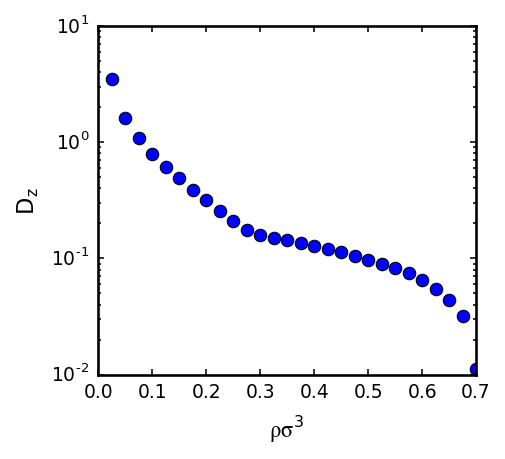

In [161]:
# single point
t = df.query('rad_r==4.0 and temp_r==0.85')
plt.plot(t.dens, t.DZ,'o')
plt.yscale('log')
plt.xlabel(r'$\rho\sigma^3$')
plt.ylabel(r'$D_z$')

* For given temperature, want to plot diffusion vs density for all pore sizes with different colors
* groupby to the rescue!

In [162]:
COLORLIST = [u'b', u'g', u'r', u'c', u'm', u'y', u'k','orange']
MARKERLIST = ['o', 's','D','v', '^', '<', '>',
             '8',  'p', '*', 'h', 'H', 'd']*10

rad = df.rad_r.unique()
color_dict = dict(zip(rad,COLORLIST))
marker_dict = dict(zip(rad,MARKERLIST))

def plot_color(x,y, rad, ax, **kwargs):
    ax.plot(x, y, color=color_dict[rad], marker=marker_dict[rad], label='%.2f'%rad, **kwargs)

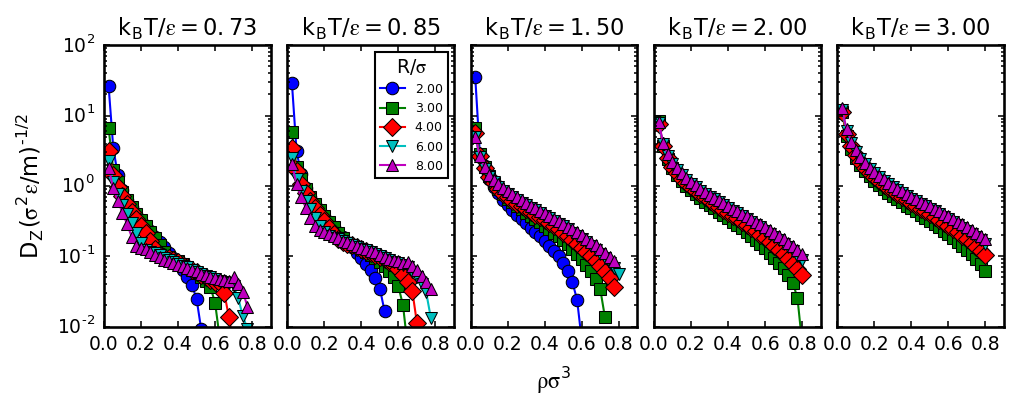

In [163]:
fig, axs = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(8,2.5))
fig.subplots_adjust(left=0.2,right=0.95,bottom=0.2,wspace=0.1)

for ax,(temp,g) in zip(axs, df.groupby('temp_r')):
    ax.set_title(r'$k_B T/\epsilon  = %.2f$'%temp)
    
    for rad_r,gg in g.groupby('rad_r'):
        color = color_dict[rad_r]
        marker = marker_dict[rad_r]
        plot_color(gg.dens, gg.DZ, rad_r, ax)
    
    
    ax.set_yscale('log')
    

axs[0].set_ylabel(r'$D_Z (\sigma^2 \epsilon/m)^{-1/2}$')
axs[2].set_xlabel(r'$\rho\sigma^3$')

axs[1].legend(loc='upper right',title=r'$R/\sigma$',fontsize=6)
pltUtils.set_axis_params(axs,dx=0.2)

In [164]:
fig.savefig('tmp.pdf')

## Compressibility factor

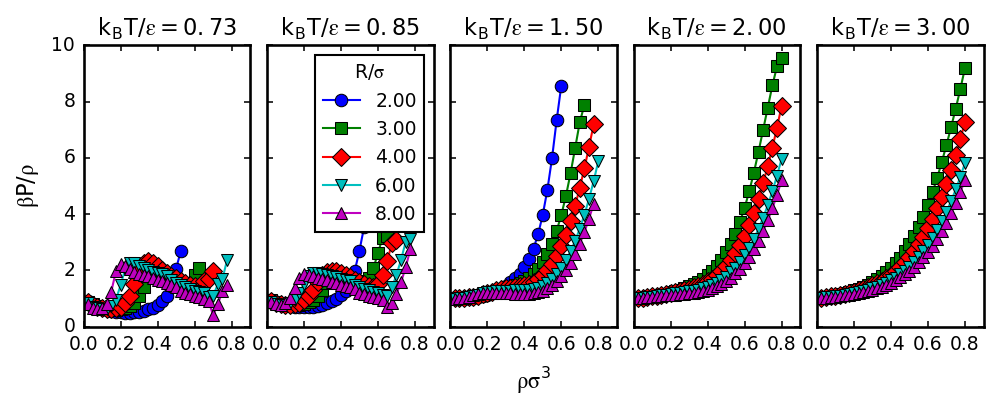

In [165]:
fig, axs = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(8,2.5))
fig.subplots_adjust(left=0.2,right=0.95,bottom=0.2,wspace=0.1)

for ax,(temp,g) in zip(axs, df.groupby('temp_r')):
    ax.set_title(r'$k_B T/\epsilon  = %.2f$'%temp)
    for rad_r,gg in g.groupby('rad_r'):
        plot_color(gg.dens, gg.Z_Z, rad_r, ax)
    
    
axs[1].legend(loc=0, title=r'$R/\sigma$')
axs[0].set_ylabel(r'$\beta P/\rho$')
axs[2].set_xlabel(r'$\rho\sigma^3$')
pltUtils.set_axis_params(axs,dx=0.2)

 * back to our task: Diffusion vs compressibility factor

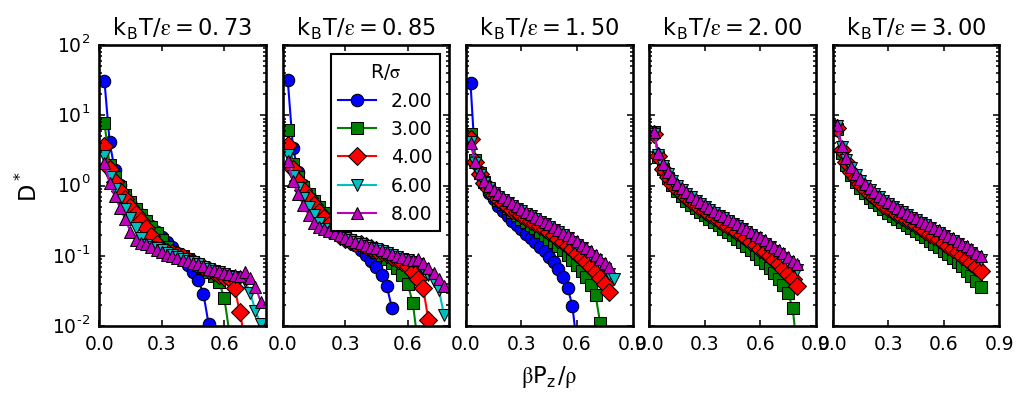

In [166]:
fig, axs = plt.subplots(nrows=1, ncols=5, sharex=False, sharey=True, figsize=(8,2.5))
fig.subplots_adjust(left=0.2,right=0.95,bottom=0.2,wspace=0.1)

axs[0].set_yscale('log')
#axs[0].set_xscale('log')

for ax,(temp,g) in zip(axs, df.groupby('temp_r')):
    ax.set_title(r'$k_B T/\epsilon  = %.2f$'%temp)
    for rad_r,gg in g.groupby('rad_r'):
        plot_color(gg.dens, gg.DZ / np.sqrt(gg.temp_r), rad_r, ax)
    
    
axs[1].legend(loc=0, title=r'$R/\sigma$')
axs[0].set_ylabel(r'$D^*$')
axs[2].set_xlabel(r'$\beta P_z/\rho$')

max_xticks = 3
for a in axs:
    a.set_xlim(left=0.0)
    xloc = plt.MaxNLocator(max_xticks)
    a.xaxis.set_major_locator(xloc)


# storing data

 * csv files are nice and simple
 * It can be a pain keeping track of tens or more of csv files
 * In this case, pytables is a better option

In [167]:
df_ave.head()

,dens,rad_r,temp_r,DZ,DZ_SE,size
0,0.025,2.0,0.73,26.467276,1.698529,3
1,0.025,2.0,0.85,29.087343,2.039595,3
2,0.025,2.0,1.50,34.868425,2.202941,3
3,0.025,3.0,0.73,6.707699,0.379430,3
4,0.025,3.0,0.85,5.772236,0.141176,3


In [168]:
df_thermo.head()

,dens,rad_r,temp_r,E,E_SE,KE,KE_SE,PE,PE_SE,PV_N_x1,PV_N_x1_SE,PV_N_x3,PV_N_x3_SE,size
0,0.025,2.0,0.73,-7.846519,0.002239,1.092976,0.000025,-8.939495,0.002263,-1.731388,0.001571,0.656239,0.001178,3
1,0.025,2.0,0.85,-7.551774,0.001048,1.274901,0.000017,-8.826675,0.001033,-1.597697,0.002057,0.797984,0.002366,3
2,0.025,2.0,1.50,-6.032308,0.002768,2.249799,0.000052,-8.282108,0.002719,-0.861779,0.003178,1.516954,0.003783,3
3,0.025,3.0,0.73,-6.612618,0.001000,1.092973,0.000013,-7.705591,0.001011,-0.523294,0.000490,0.648397,0.000426,3
4,0.025,3.0,0.85,-6.305132,0.000576,1.274889,0.000029,-7.580020,0.000598,-0.416348,0.000971,0.789960,0.000929,3


In [171]:
df_ave.to_hdf('sim_data.h5','diffusion')
df_thermo.to_hdf('sim_data.h5','thermo')

In [173]:
with pd.HDFStore('sim_data.h5') as h5:
    print h5
    d = h5['/diffusion']
    t = h5['/thermo']

<class 'pandas.io.pytables.HDFStore'>
File path: sim_data.h5
/diffusion            frame        (shape->[727,6]) 
/thermo               frame        (shape->[727,14])


In [174]:
d.head()

,dens,rad_r,temp_r,DZ,DZ_SE,size
0,0.025,2.0,0.73,26.467276,1.698529,3
1,0.025,2.0,0.85,29.087343,2.039595,3
2,0.025,2.0,1.50,34.868425,2.202941,3
3,0.025,3.0,0.73,6.707699,0.379430,3
4,0.025,3.0,0.85,5.772236,0.141176,3


In [175]:
t.head()

,dens,rad_r,temp_r,E,E_SE,KE,KE_SE,PE,PE_SE,PV_N_x1,PV_N_x1_SE,PV_N_x3,PV_N_x3_SE,size
0,0.025,2.0,0.73,-7.846519,0.002239,1.092976,0.000025,-8.939495,0.002263,-1.731388,0.001571,0.656239,0.001178,3
1,0.025,2.0,0.85,-7.551774,0.001048,1.274901,0.000017,-8.826675,0.001033,-1.597697,0.002057,0.797984,0.002366,3
2,0.025,2.0,1.50,-6.032308,0.002768,2.249799,0.000052,-8.282108,0.002719,-0.861779,0.003178,1.516954,0.003783,3
3,0.025,3.0,0.73,-6.612618,0.001000,1.092973,0.000013,-7.705591,0.001011,-0.523294,0.000490,0.648397,0.000426,3
4,0.025,3.0,0.85,-6.305132,0.000576,1.274889,0.000029,-7.580020,0.000598,-0.416348,0.000971,0.789960,0.000929,3


# size/speed comparison

In [176]:
%%bash 
ls -lh profiles*

-rw-r--r--  1 wpk  wpk    26M Jun 21 15:20 profiles.csv
-rw-r--r--  1 wpk  wpk    12M Jun 21 15:21 profiles.h5


In [177]:
%timeit -n 1 df1 = pd.read_csv('profiles.csv')

1 loop, best of 3: 619 ms per loop


In [178]:
%timeit -n 1 df2 = pd.read_hdf('profiles.h5','profiles')

1 loop, best of 3: 89.4 ms per loop


### Note: hdf5 storage is on disk.  That is, data is loaded on demand only!

In [179]:
h5 = pd.HDFStore('sim_data.h5')

In [180]:
h5['diffusion'].head()

,dens,rad_r,temp_r,DZ,DZ_SE,size
0,0.025,2.0,0.73,26.467276,1.698529,3
1,0.025,2.0,0.85,29.087343,2.039595,3
2,0.025,2.0,1.50,34.868425,2.202941,3
3,0.025,3.0,0.73,6.707699,0.379430,3
4,0.025,3.0,0.85,5.772236,0.141176,3


In [181]:
h5['thermo'].head()

,dens,rad_r,temp_r,E,E_SE,KE,KE_SE,PE,PE_SE,PV_N_x1,PV_N_x1_SE,PV_N_x3,PV_N_x3_SE,size
0,0.025,2.0,0.73,-7.846519,0.002239,1.092976,0.000025,-8.939495,0.002263,-1.731388,0.001571,0.656239,0.001178,3
1,0.025,2.0,0.85,-7.551774,0.001048,1.274901,0.000017,-8.826675,0.001033,-1.597697,0.002057,0.797984,0.002366,3
2,0.025,2.0,1.50,-6.032308,0.002768,2.249799,0.000052,-8.282108,0.002719,-0.861779,0.003178,1.516954,0.003783,3
3,0.025,3.0,0.73,-6.612618,0.001000,1.092973,0.000013,-7.705591,0.001011,-0.523294,0.000490,0.648397,0.000426,3
4,0.025,3.0,0.85,-6.305132,0.000576,1.274889,0.000029,-7.580020,0.000598,-0.416348,0.000971,0.789960,0.000929,3


In [182]:
h5.close()

In [183]:
h5 = pd.HDFStore('./cyl_1043.h5')
h5

<class 'pandas.io.pytables.HDFStore'>
File path: ./cyl_1043.h5
/BH                                           frame_table  (typ->appendable,nrows->25,ncols->7,indexers->[index],dc->[rad_r,temp_r])                              
/BH_profile                                   frame_table  (typ->appendable,nrows->654,ncols->6,indexers->[index],dc->[rad_r,temp_r])                             
/coex                                         frame_table  (typ->appendable,nrows->16,ncols->8,indexers->[index])                                                 
/diffusion                                    frame_table  (typ->appendable,nrows->846,ncols->10,indexers->[index],dc->[dens,rad_r,temp_r,tmin])                  
/diffusion_slab                               frame_table  (typ->appendable,nrows->551,ncols->19,indexers->[index],dc->[dens,rad_r,temp_r,layer,grid_type])       
/effective_diameter_from_potential            frame_table  (typ->appendable,nrows->150,ncols->12,indexers->[index],dc->[ra

In [184]:
h5.keys()

['/BH',
 '/BH_profile',
 '/coex',
 '/diffusion',
 '/diffusion_slab',
 '/effective_diameter_from_potential',
 '/isotherms',
 '/md_thermo',
 '/profile_bounds_fac',
 '/profiles',
 '/state_point_map',
 '/sxfx',
 '/tmmc']

In [185]:
import pyMods.SimDataV4 as SD

In [186]:
SD = SD.SimData(Coex=h5['coex'],
           dfdic=dict(diffusion=h5['diffusion'],
                      thermo=h5['md_thermo'],
                      profiles=h5['profiles'],
                     isotherms=h5['isotherms']),
           StatePointMap=h5['state_point_map'],
           **h5['profile_bounds_fac'].to_dict())

In [187]:
SD.diffusion.head()

,dens,npart,rad,temp,tmin,DZ,DZ_SE,DZ_size,rad_r,temp_r
0,0.025,4000,3.9864,0.72871,1000,2.811286,0.164898,3,3.99,0.73
1,0.025,4000,3.9864,0.85000,1000,3.123056,0.012918,4,3.99,0.85
2,0.025,4000,3.9864,1.25000,1000,4.019047,0.156800,3,3.99,1.25
3,0.025,4000,3.9864,1.50000,1000,4.651626,0.049734,4,3.99,1.50
4,0.025,4000,3.9864,2.00000,1000,6.081668,0.041290,3,3.99,2.00


In [188]:
SD.isotherms.head()

,p_scaled,mu,dens,omega_v,qst,gads,branch,temp_r,rad_r
0,4.364769e-08,-20.000000,0.000107,-0.003907,11.075481,0.000272,0,0.73,3.99
1,4.438793e-08,-19.987745,0.000109,-0.003973,11.075515,0.000277,0,0.73,3.99
2,4.514073e-08,-19.975490,0.000111,-0.004040,11.075549,0.000281,0,0.73,3.99
3,4.590630e-08,-19.963235,0.000113,-0.004109,11.075583,0.000286,0,0.73,3.99
4,4.668486e-08,-19.950980,0.000115,-0.004179,11.075619,0.000291,0,0.73,3.99


In [189]:
SD.profiles.head()

,r,rho,dens,rad_r,temp_r
0,0.00,5.170733e-07,0.025,3.99,0.73
1,0.01,5.686332e-07,0.025,3.99,0.73
2,0.02,6.201931e-07,0.025,3.99,0.73
3,0.03,6.717529e-07,0.025,3.99,0.73
4,0.04,7.233128e-07,0.025,3.99,0.73


In [190]:
SD.add_stability(inplace=True)

In [191]:
SD.profiles.head()

,r,rho,dens,rad_r,temp_r,stability
0,0.00,5.170733e-07,0.025,3.99,0.73,STABV
1,0.01,5.686332e-07,0.025,3.99,0.73,STABV
2,0.02,6.201931e-07,0.025,3.99,0.73,STABV
3,0.03,6.717529e-07,0.025,3.99,0.73,STABV
4,0.04,7.233128e-07,0.025,3.99,0.73,STABV


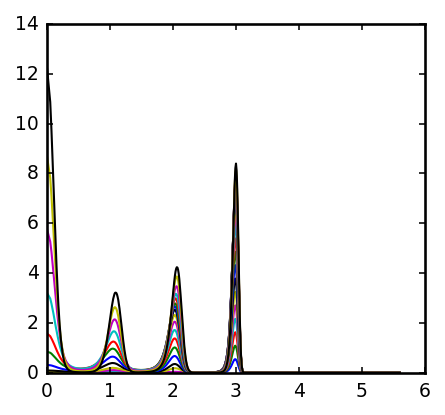

In [192]:
for dens,g in SD.profiles.query('rad_r==3.99 and temp_r==0.73').groupby('dens'):
    plt.plot(g.r, g.rho, label=dens)
    
#plt.legend()